# Import Data and Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\4 Python Fundamentals\Instacart Basket Analysis"
insta_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_full_merge.pkl'))

In [ ]:
#Double check data
insta_all.describe()

In [ ]:
insta_all.head()

In [ ]:
insta_all.info()

# Creating Bar Charts

In [ ]:
#Bar chart of order day of week frequency
insta_all['orders_day_of_week'].value_counts().plot.bar()

In [ ]:
#Same bar chart sorted by day number instead of largest to smallest
insta_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [ ]:
#Same chart w/ color
bar = insta_all['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [ ]:
#Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

## Histograms

In [ ]:
insta_all['prices'].plot.hist(bins = 25)

### Exploring data to find and understand outliers in price column

In [ ]:
#Scatter plot of prices
sns.scatterplot(x = 'prices', y = 'prices',data = insta_all)

In [ ]:
#Find items over threshold price ($100)
insta_all.loc[insta_all['prices'] > 100]

In [ ]:
#Turn prices above $100 into NaN (missing) values
insta_all.loc[insta_all['prices'] >100, 'prices'] = np.nan

In [ ]:
#Check max value in prices column
insta_all['prices'].max()

In [ ]:
#Recreate prices histogram
hist = insta_all['prices'].plot.hist(bins = 25)

In [ ]:
#Recreate prices histogram with 70 bins (higher level of granularity)
hist_2 = insta_all['prices'].plot.hist(bins = 70)

In [ ]:
#Export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# Creating Line Charts + Sampling Data

In [ ]:
#Create sample
np.random.seed(4)
dev = np.random.rand(len(insta_all)) <= 0.7

In [ ]:
#Check results
dev

In [ ]:
#70% of sample to dataframe big
big = insta_all[dev]

In [ ]:
#30% of sample to dataframe small
small = insta_all[~dev]

In [ ]:
#double check results: size of ords_prods_merge dataframe
len(insta_all)

In [ ]:
#Size of big and small dataframes combined
len(big) + len(small)

In [ ]:
#Create dataframe of just columns needed for the line charts
df_2 = small[['orders_day_of_week','prices']]

In [ ]:
#Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Step 3 - Order Times Histogram

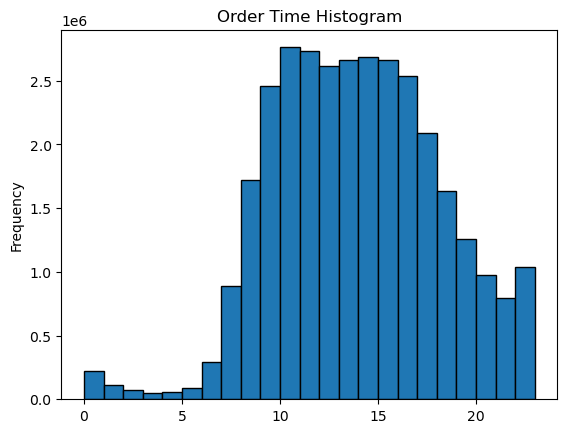

In [3]:
#Histogram of orders time column
time_hist = insta_all['orders_time'].plot.hist(bins = 23, edgecolor='black', title = 'Order Time Histogram')

Originally ran it with bins = 25 but then each bar was an odd range of time, so I checked the max and min values (see below) to determine a bin size such that each bar is 1 hour of the day.

In [31]:
insta_all['orders_time'].max()

23

In [32]:
insta_all['orders_time'].min()

0

The histogram shows that the majority of orders occur from 9a to 5p, and few orders occur from midnight to 6a. This could mean that customers are using Instacart during their work day to have food and other necessities delivered because they can't go out to get what they need. Outside of 9-5, the next most busiest range of ordering times is in the evening from 5-11p. Based on this histogram, I don't think it would make much sense to target and try to increase sales from midnight to 6a, because those sales are low because that's when most people are asleep. It would make more sense to target popular order times, in particular 9-5. I think the evening sales occur because people might be tired at the end of the day or forget to pick something up on the way home but they're using Instacart for convenience, whereas for the 9-5 block I think Instacart is more likely to be used out of necessity. Increasing ads and incentives (discounts, etc.) at this time could further motivate orders when customers are stuck at work and can't go out to get what they need.

In [4]:
#Export histogram
time_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_time_hist.png'))

# Step 4 - Order Distribution by Loyalty

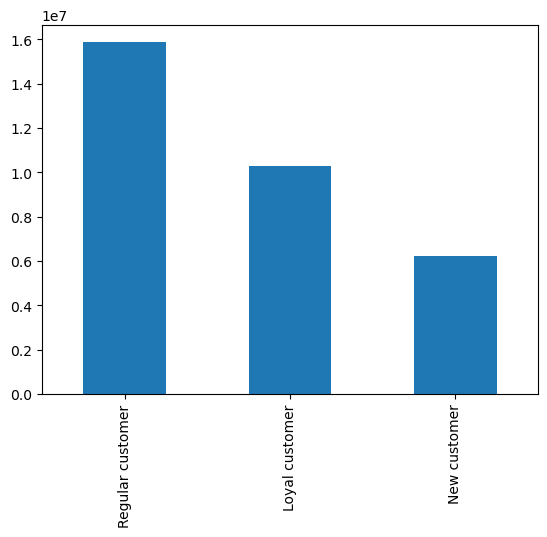

In [56]:
#Bar chart from loyalty_flag column
cust_bar = insta_all['loyalty_flag'].value_counts().plot.bar()

In [57]:
#Export bar chart
cust_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_bar.png'))

# Step 5 - Explore Spending vs. Time

In [45]:
#Create floating numbers for sampling
np.random.seed(4)
dev = np.random.rand(len(insta_all)) <= 0.7

In [47]:
#Split dataframe into 2 samples. 70/30 split
big = insta_all[dev]
small = insta_all[~dev]

In [48]:
#Check results
len(insta_all)

32404859

In [49]:
len(big) + len(small)

32404859

In [51]:
#Make df of just columns necessary for this analysis
exp_v_time = small[['prices', 'orders_time']]

In [52]:
#Check results
exp_v_time.head()

prices  orders_time
0      9.0            8
2      9.0           12
3      9.0            7
6      9.0            9
10     9.0            9

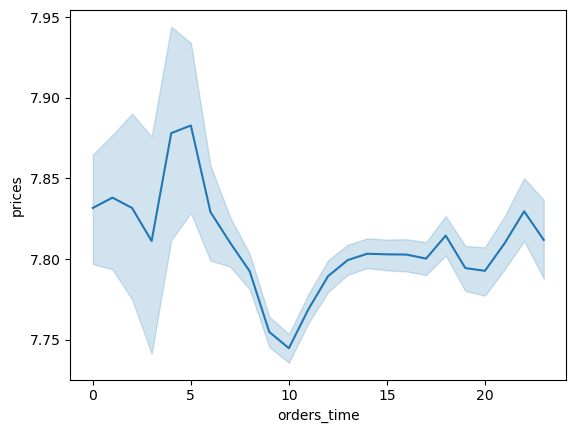

In [54]:
exp_line = sns.lineplot(data = exp_v_time, x = 'orders_time', y = 'prices')

Expenditure spikes at approximately 5 am, then promptly declines to its minimum at approximately 10 am. It's fairly stead from noon to midnight.

In [58]:
#Export line chart
exp_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'exp_line.png'))

# Step 6 - Age v Dependents

In [60]:
insta_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   orders_time             int8    
 5   days_since_prior_order  float16 
 6   First Order             bool    
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  product_name            object  
 11  aisle_id                int16   
 12  department_id           int8    
 13  prices                  float32 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  avg_or

In [61]:
#df of columns for this analysis
age_v_deps = small[['Age', 'num_dependents']]

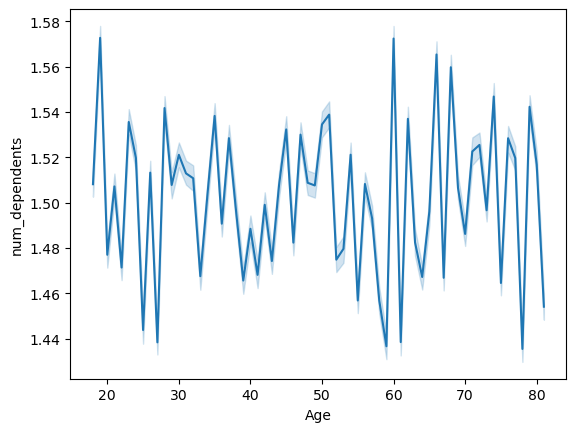

In [62]:
dep_line = sns.lineplot(data = age_v_deps, x = 'Age', y = 'num_dependents')

There is no clear correlation between age and number of dependents. Number of dependents oscillates from 1.44 to 1.58 with no clear trend.

In [64]:
#Export line chart
dep_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_line.png'))

# Age v Spending Power

In [65]:
age_v_SP = insta_all[['Age', 'income']]

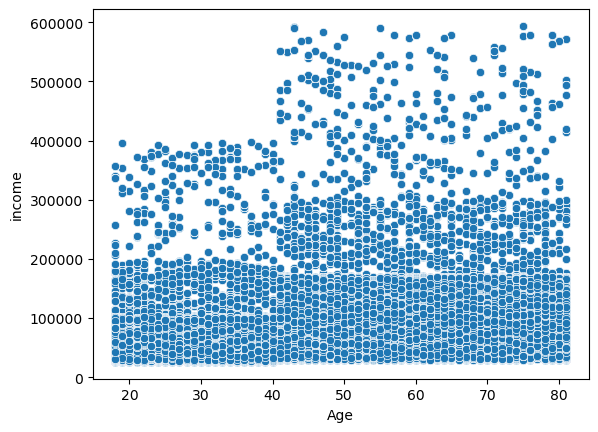

In [67]:
SP_scatter = sns.scatterplot(x = 'Age', y = 'income',data = age_v_SP)

Based on this scatter plot, across all ages the majority of Instacart users have a salary of 200k or less. A small number of users from 20-40 years old make 200-400k. At 40 and older, there is a clear jump in salary range, with a small chunk of users over 40 making up to 600k. At 40+, there is also a larger chunk of users that make over 200k, with an increase in scatter plot density from 200-300k. 

In [68]:
#Export scatter chart
SP_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'SP_scatter.png'))